# TinyML HelloWorld
Based on the **hello_world** example from [TensorFlow Lite for MicroControllers](https://github.com/tensorflow/tflite-micro/tree/main/tensorflow/lite/micro/examples/hello_world).



## Introduction

In this section you will train a Tensorflow model to a set of sinusoidal data. First you will synthesize the data to mimic a sine wave. Then you can build your own tensorflow model and fit the model to the generated data. Start by importing the relevant modules.

## Import modules

In [ ]:
import tensorflow as tf
import numpy as np
np.random.seed(1)
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(1)

In [ ]:
import os
from tensorflow import keras
import matplotlib.pyplot as plt
import math

##  Create the Dataset

You can use NumPy to generate a sinewave data and add some gaussian noise to make the data more realistic. The dataset will consist of 1000 datapoints (x-values) and relevant y-values. The following code creates a sine wave dataset.

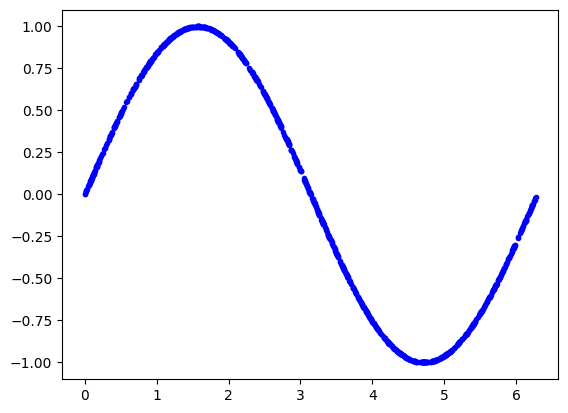

In [ ]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot the data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

Next add noise to the data to make the data more realistic. (In real-life the data we obtain usually get contaminated by different kinds of noise.)

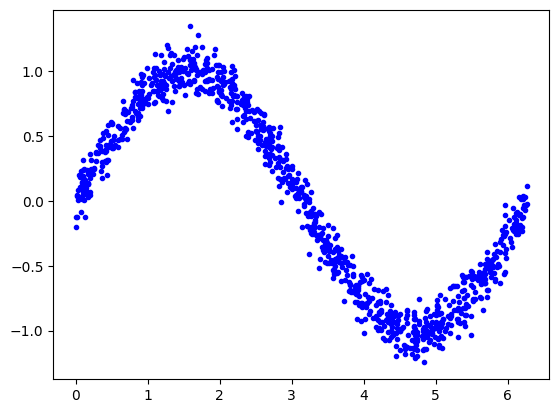

In [ ]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

## Pre-process data




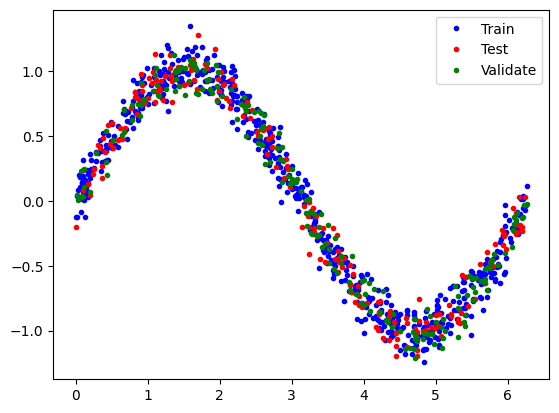

In [ ]:
# Define the indices where the dataset will get chopped
TRAIN_SPLIT = int(0.6 * SAMPLES)  # 60% of data
TEST_SPLIT = int(0.8 * SAMPLES)   # 80% of data (train + validation)

# Use np.split to chop the data into three parts
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'g.', label="Validate")
plt.legend()
plt.show()

## Build the Model




In [ ]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

In [ ]:
# Get model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=64,
                    validation_data=(x_validate, y_validate))

Epoch 1/500
10/10 [==============================] - 1s 18ms/step - loss: 0.7497 - mae: 0.7672 - val_loss: 0.6819 - val_mae: 0.7385
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6117 - mae: 0.7025 - val_loss: 0.5705 - val_mae: 0.6785
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 0.5341 - mae: 0.6537 - val_loss: 0.5053 - val_mae: 0.6291
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4854 - mae: 0.6163 - val_loss: 0.4631 - val_mae: 0.5950
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4562 - mae: 0.5913 - val_loss: 0.4412 - val_mae: 0.5763
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4352 - mae: 0.5723 - val_loss: 0.4208 - val_mae: 0.5584
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4143 - mae: 0.5556 - val_loss: 0.3985 - val_mae: 0.5421
Epoch 8/500
10/10 [==============================] - 0s 7ms/step - loss: 0.3915 - 

10/10 [==============================] - 0s 6ms/step - loss: 0.0789 - mae: 0.2064 - val_loss: 0.0799 - val_mae: 0.2082
Epoch 64/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0785 - mae: 0.2046 - val_loss: 0.0796 - val_mae: 0.2071
Epoch 65/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0779 - mae: 0.2045 - val_loss: 0.0793 - val_mae: 0.2081
Epoch 66/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0775 - mae: 0.2043 - val_loss: 0.0788 - val_mae: 0.2071
Epoch 67/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0770 - mae: 0.2030 - val_loss: 0.0785 - val_mae: 0.2060
Epoch 68/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0766 - mae: 0.2020 - val_loss: 0.0780 - val_mae: 0.2050
Epoch 69/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0761 - mae: 0.2008 - val_loss: 0.0776 - val_mae: 0.2045
Epoch 70/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0757 - mae: 0

Epoch 125/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0551 - mae: 0.1655 - val_loss: 0.0578 - val_mae: 0.1750
Epoch 126/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0549 - mae: 0.1666 - val_loss: 0.0577 - val_mae: 0.1762
Epoch 127/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0545 - mae: 0.1660 - val_loss: 0.0572 - val_mae: 0.1745
Epoch 128/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0543 - mae: 0.1640 - val_loss: 0.0567 - val_mae: 0.1722
Epoch 129/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0540 - mae: 0.1631 - val_loss: 0.0565 - val_mae: 0.1724
Epoch 130/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0536 - mae: 0.1627 - val_loss: 0.0563 - val_mae: 0.1722
Epoch 131/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0535 - mae: 0.1638 - val_loss: 0.0560 - val_mae: 0.1726
Epoch 132/500
10/10 [==============================] - 0s 5ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.0384 - mae: 0.1403 - val_loss: 0.0413 - val_mae: 0.1496
Epoch 187/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0383 - mae: 0.1404 - val_loss: 0.0409 - val_mae: 0.1490
Epoch 188/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0380 - mae: 0.1397 - val_loss: 0.0406 - val_mae: 0.1482
Epoch 189/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0377 - mae: 0.1390 - val_loss: 0.0403 - val_mae: 0.1478
Epoch 190/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0376 - mae: 0.1386 - val_loss: 0.0401 - val_mae: 0.1474
Epoch 191/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0374 - mae: 0.1389 - val_loss: 0.0401 - val_mae: 0.1478
Epoch 192/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0369 - mae: 0.1382 - val_loss: 0.0399 - val_mae: 0.1479
Epoch 193/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0368 -

Epoch 248/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0238 - mae: 0.1127 - val_loss: 0.0256 - val_mae: 0.1214
Epoch 249/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0238 - mae: 0.1138 - val_loss: 0.0256 - val_mae: 0.1215
Epoch 250/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0236 - mae: 0.1130 - val_loss: 0.0247 - val_mae: 0.1185
Epoch 251/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0233 - mae: 0.1115 - val_loss: 0.0248 - val_mae: 0.1198
Epoch 252/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0234 - mae: 0.1124 - val_loss: 0.0250 - val_mae: 0.1204
Epoch 253/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0228 - mae: 0.1108 - val_loss: 0.0242 - val_mae: 0.1179
Epoch 254/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0228 - mae: 0.1107 - val_loss: 0.0244 - val_mae: 0.1190
Epoch 255/500
10/10 [==============================] - 0s 6ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.0152 - mae: 0.0953 - val_loss: 0.0156 - val_mae: 0.0982
Epoch 310/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0158 - mae: 0.0973 - val_loss: 0.0152 - val_mae: 0.0979
Epoch 311/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0157 - mae: 0.0979 - val_loss: 0.0154 - val_mae: 0.0989
Epoch 312/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0154 - mae: 0.0974 - val_loss: 0.0151 - val_mae: 0.0965
Epoch 313/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0156 - mae: 0.0969 - val_loss: 0.0148 - val_mae: 0.0965
Epoch 314/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0154 - mae: 0.0974 - val_loss: 0.0157 - val_mae: 0.1003
Epoch 315/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0155 - mae: 0.0971 - val_loss: 0.0148 - val_mae: 0.0956
Epoch 316/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0152 -

Epoch 371/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0128 - mae: 0.0898 - val_loss: 0.0119 - val_mae: 0.0879
Epoch 372/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0128 - mae: 0.0900 - val_loss: 0.0120 - val_mae: 0.0881
Epoch 373/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0127 - mae: 0.0899 - val_loss: 0.0117 - val_mae: 0.0873
Epoch 374/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0127 - mae: 0.0899 - val_loss: 0.0116 - val_mae: 0.0864
Epoch 375/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0125 - mae: 0.0892 - val_loss: 0.0117 - val_mae: 0.0873
Epoch 376/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0125 - mae: 0.0891 - val_loss: 0.0118 - val_mae: 0.0877
Epoch 377/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0125 - mae: 0.0891 - val_loss: 0.0115 - val_mae: 0.0864
Epoch 378/500
10/10 [==============================] - 0s 7ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.0122 - mae: 0.0886 - val_loss: 0.0111 - val_mae: 0.0851
Epoch 433/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0120 - mae: 0.0877 - val_loss: 0.0108 - val_mae: 0.0834
Epoch 434/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0119 - mae: 0.0872 - val_loss: 0.0108 - val_mae: 0.0837
Epoch 435/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0121 - mae: 0.0878 - val_loss: 0.0110 - val_mae: 0.0843
Epoch 436/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0126 - mae: 0.0894 - val_loss: 0.0109 - val_mae: 0.0842
Epoch 437/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0119 - mae: 0.0872 - val_loss: 0.0108 - val_mae: 0.0833
Epoch 438/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0119 - mae: 0.0873 - val_loss: 0.0110 - val_mae: 0.0851
Epoch 439/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0123 -

Epoch 494/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0122 - mae: 0.0882 - val_loss: 0.0108 - val_mae: 0.0839
Epoch 495/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0120 - mae: 0.0876 - val_loss: 0.0104 - val_mae: 0.0824
Epoch 496/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0122 - mae: 0.0883 - val_loss: 0.0115 - val_mae: 0.0854
Epoch 497/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0122 - mae: 0.0878 - val_loss: 0.0107 - val_mae: 0.0835
Epoch 498/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0119 - mae: 0.0871 - val_loss: 0.0107 - val_mae: 0.0829
Epoch 499/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0121 - mae: 0.0879 - val_loss: 0.0106 - val_mae: 0.0826
Epoch 500/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0122 - mae: 0.0884 - val_loss: 0.0112 - val_mae: 0.0853


## Plotting Loss Curves



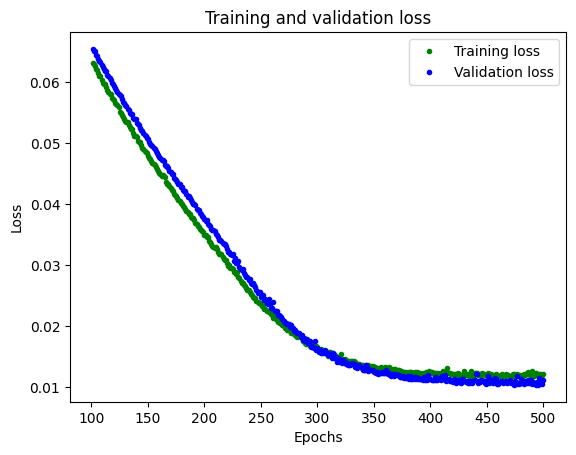

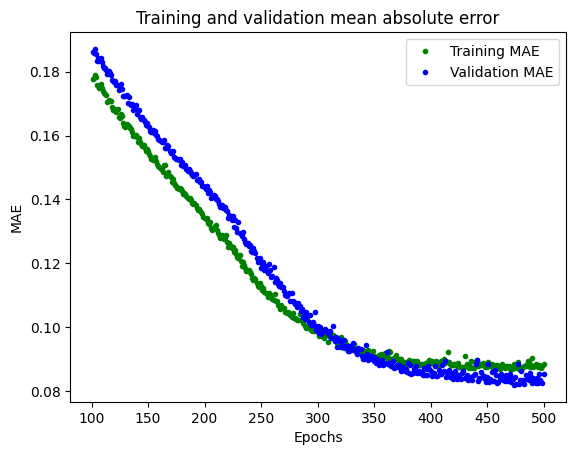

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Predict using model

7/7 [==============================] - 0s 3ms/step


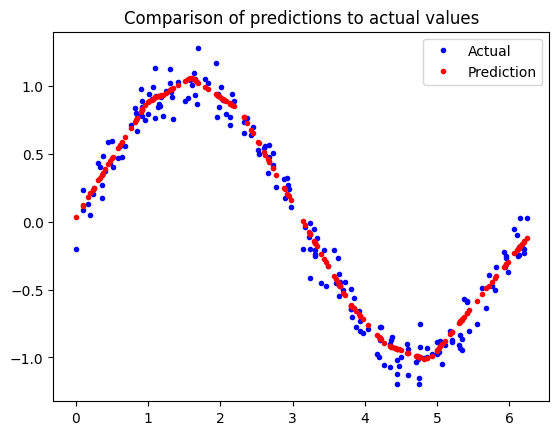

In [ ]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

## Get weights

Now you will extract the weight matrices from the model. This step is in order to convert these weight matrices to C++ files that will be embedded in the Microcontroller.

In [ ]:
# Extract weights and biases as Numpy arrays
W1, b1 = model.layers[0].get_weights()
W2, b2 = model.layers[1].get_weights()
W3, b3 = model.layers[2].get_weights()

In [ ]:
print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(W3.shape, b3.shape)

(1, 16) (16,)
(16, 16) (16,)
(16, 1) (1,)


The following code performs the forward propagation of the model manually using NumPy matrix multiplication. Run the following code to make sure the model's prediction and manual prediction is same.

In [ ]:
xs = x_test

In [ ]:
# This is what the TF model does internally:
ys = []
for x in xs:
    x = np.array([x])       # x should be array
    h1 = x @ W1 + b1        # dense layer
    h1 = np.maximum(0, h1)  # ReLU
    h2 = h1 @ W2 + b2       # dense layer
    h2 = np.maximum(0, h2)  # ReLU
    h3 = h2 @ W3 + b3       # dense layer
    ys.append(h3)

ys = np.stack(ys)

In [ ]:
# Are our predictions the same as TF's predictions?
# This should print 0 if the results are close enough.
np.sum(np.abs(ys - predictions) > 1e-6)

0

## Export the weights for C++

The following code compresses the weights and biases into a C++ format which will be stored in the Microcontroller's FLASH memory.

In [ ]:
# Note that we transpose W2. This makes the inner loop for the
# matrix multiplication a little simpler.

names = ["W1_data", "b1_data", "W2_data", "b2_data", "W3_data", "b3_data"]
arrays = [W1, b1, W2.T, b2, W3, b3]

In [ ]:
# Copy this into model_data.cpp:

for name, array in zip(names, arrays):
    print("const float %s[] PROGMEM = {" % name)
    print("   ", ", ".join([str(x) + "f" for x in array.flatten()]))
    print("};\n")

const float W1_data[] PROGMEM = {
    -0.091006815f, -0.34667498f, 0.083646f, -0.08104414f, 0.06681481f, -0.29250097f, -0.59262145f, -0.0053295493f, 0.4474075f, -0.4070573f, -0.20671749f, 0.34306002f, -0.35022438f, 0.37900433f, -0.5678929f, -0.11433974f
};

const float b1_data[] PROGMEM = {
    0.0f, 0.0f, -0.13400166f, 0.0f, 1.137083f, 0.0f, 0.0f, 0.0f, -0.49266362f, 0.0f, 0.0f, 0.4233269f, 0.0f, -0.8602816f, 0.0f, 0.0f
};

const float W2_data[] PROGMEM = {
    -0.08713135f, -0.2310905f, 0.029111028f, 0.42581645f, -0.17963502f, 0.43129173f, -0.18844938f, -0.22596659f, -0.00605917f, -0.189939f, -0.22710015f, -0.05213636f, 0.3744866f, -0.2224123f, -0.3645582f, -0.029113412f, -0.090498775f, -0.17003685f, 0.34221417f, 0.16098914f, -0.3585649f, -0.15570891f, -0.25634807f, -0.35452682f, 0.1483483f, 0.19254896f, -0.25451383f, -0.1523825f, -0.15513048f, -0.093749225f, -0.038352698f, 0.342006f, -0.25469655f, 0.067326754f, 0.16255945f, -0.41344696f, 0.6157323f, 0.0048325956f, -0.0006529689f, 0.